In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df.shape

(41188, 21)

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 Some basics observations : 
 
> The goal is to predict if a person will suscribed (feature : y)

> It's a binary classification

> We have 21 features 

> No missing values   

> The class to predict is pretty imbalanced    

> We have numerical and categorical variables

In [10]:
"""
EDA 
Outliers
Encoder
Split
Baseline model 
Feature engineering
Model
Hyperparameter tuning
"""

'\nEDA \nOutliers\nEncoder\nSplit\nBaseline model \nFeature engineering\nModel\nHyperparameter tuning\n'

## EDA

In [11]:
var_num = df.select_dtypes(include=['float64', 'int64'])
var_cat = df.select_dtypes(exclude=['float64', 'int64'])

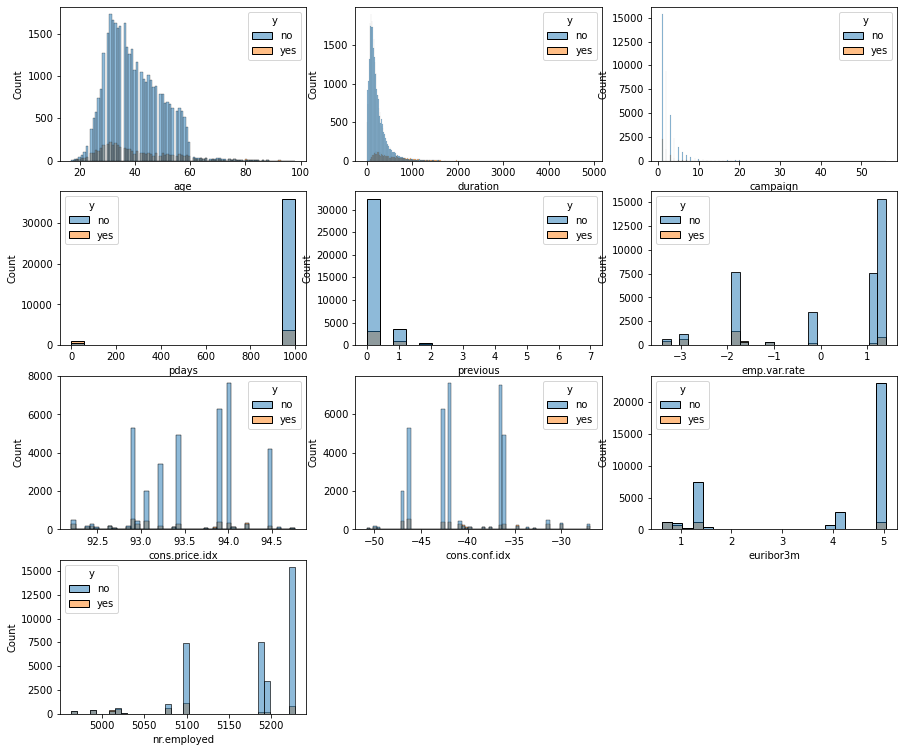

In [12]:
c = 1 
nrows = round(len(var_num.columns) / 3) + 1
fig = plt.figure(figsize=(15,13))
for i in var_num.columns:
    plt.subplot(nrows, 3, c)
    sns.histplot(x=i, hue='y', data=df)
    c += 1 
plt.show()

### Age

<AxesSubplot:xlabel='age', ylabel='Count'>

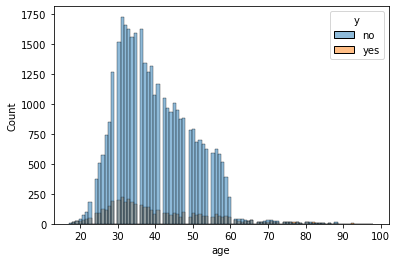

In [13]:
sns.histplot(x='age', hue='y', data=df)

Let's cut the values of age in marketing segment

In [14]:
labels = ['0-3', '4-8', '9-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '+85']
bins = [0, 3, 8, 12, 17, 24, 34, 44, 54, 64, 74, 84, 120]
df["age_bins"] = pd.Categorical(pd.cut(df.age, bins, labels=labels), categories=labels, ordered=True)

<AxesSubplot:xlabel='age_bins', ylabel='Count'>

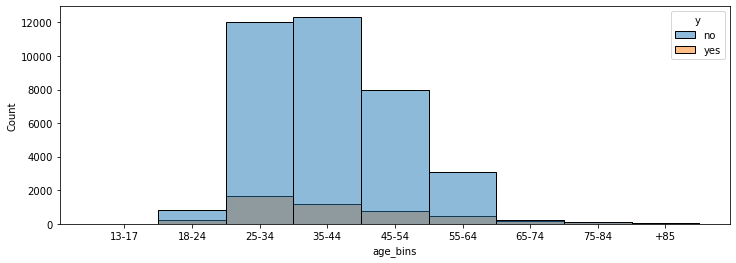

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(x='age_bins', hue='y', data=df)

In [16]:
age_grouped = df.groupby(['age_bins', 'y'])['y'].count()
age_per = age_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [17]:
age_per.filter(like='yes').sort_values(ascending=False)

age_bins  y  
75-84     yes    52.606635
+85       yes    50.000000
65-74     yes    43.908629
13-17     yes    40.000000
18-24     yes    23.894638
55-64     yes    13.568825
25-34     yes    12.173024
35-44     yes     8.651852
45-54     yes     8.651195
0-3       yes          NaN
4-8       yes          NaN
9-12      yes          NaN
Name: y, dtype: float64

> Here we can see the proportion of each category of age with the corresponding percentage of subscriptions

> The old persons seem to be more inclined to subscribed (these numbers should be taken with a grain of salt due to the low volume of observations on these categories)

### Campaign

According to the data description, the feature correspond to the number of times a client has been contacted for this campaign

C:\Users\riche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


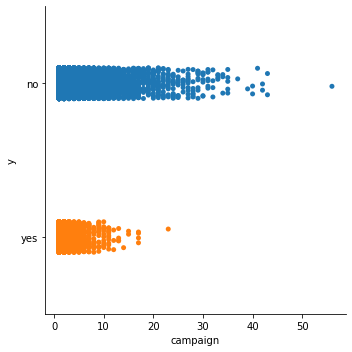

In [18]:
sns.catplot('campaign', 'y', data=df)

> We can see that people who get a subscription do it before the 15th contacts. In most cases, the client get the subscription before the 10th contact

> It doesn't seems to be useful to contact a person much more than 10 times 

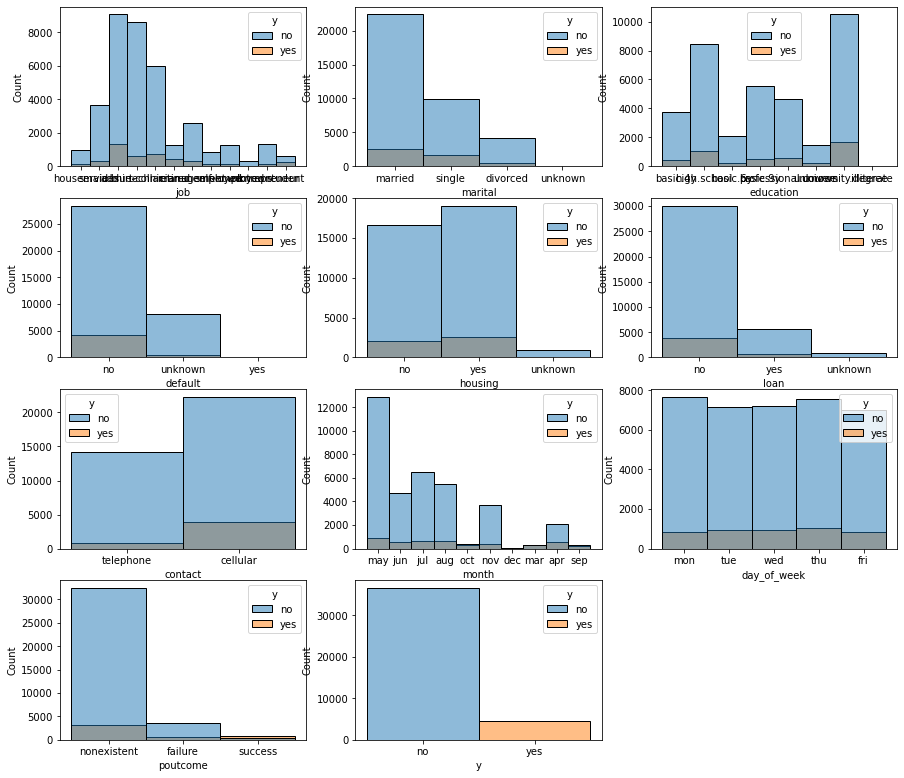

In [19]:
c = 1 
nrows = round(len(var_cat.columns) / 3) + 1
fig = plt.figure(figsize=(15,17))
for i in var_cat.columns:
    plt.subplot(nrows, 3, c)
    sns.histplot(x=i, hue='y', data=df)
    c += 1 
plt.show()

### Poutcome

According to the data description, the feature indicates if the client subscribed on the last campaign

<AxesSubplot:xlabel='poutcome', ylabel='Count'>

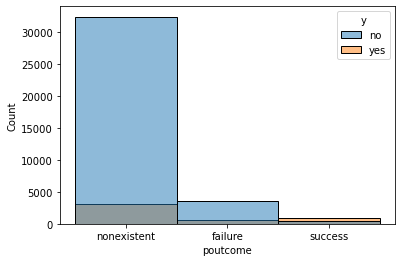

In [20]:
sns.histplot(x='poutcome', hue='y', data=df)

In [21]:
poutcome_grouped = df.groupby(['poutcome', 'y'])['y'].count()

In [22]:
poutcome_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

poutcome     y  
failure      no     85.771402
             yes    14.228598
nonexistent  no     91.167787
             yes     8.832213
success      no     34.887109
             yes    65.112891
Name: y, dtype: float64

> Here we clearly see that the percentage of subscription is much more high if the result of the previous campaign was a success

> Unfortunately the volume of this category is insufficient to make proper conclusions

### Month

In [23]:
df['month'] = pd.Categorical(df['month'], categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                   ordered=True)

<AxesSubplot:xlabel='month', ylabel='Count'>

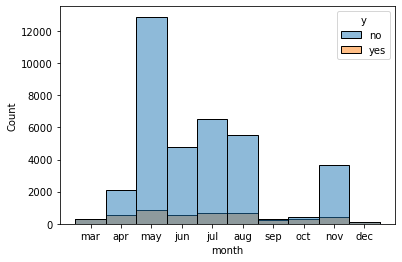

In [24]:
sns.histplot(x='month', hue='y', data=df)

> The campaign begun in march with the highest number of contacts in may

> The number of subscription seems to be regular during all the year, except at the begin and the end of the campaign

> The number of subscriptions doesn't seems to be proportional at the number of contacts and tend to a have a maximum of volume

### Day of the week

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

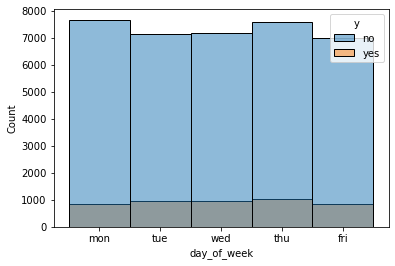

In [25]:
sns.histplot(x='day_of_week', hue='y', data=df)

> The number of contacts and subscriptions is regular

> It doesn't seems to have a better day to contact the potential subscribers

### Job

<AxesSubplot:xlabel='job', ylabel='Count'>

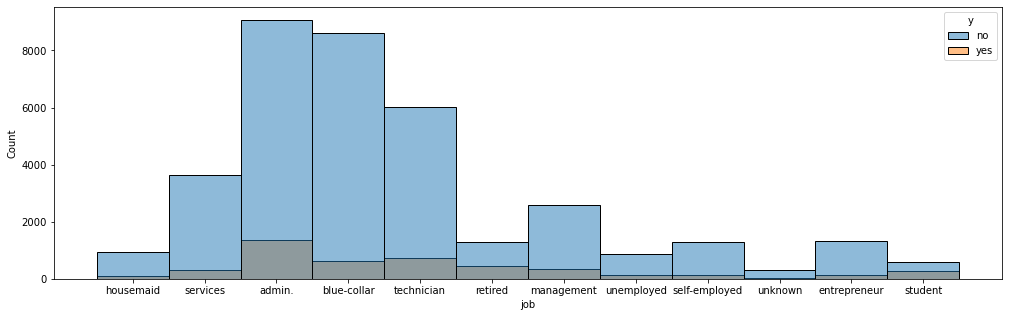

In [26]:
plt.figure(figsize=(17,5))
sns.histplot(x='job', hue='y', data=df)

In [27]:
poutcome_grouped = df.groupby(['job', 'y'])['y'].count()
poutcome_per = poutcome_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [28]:
poutcome_per.filter(like='yes').sort_values(ascending=False)

job            y  
student        yes    31.428571
retired        yes    25.232558
unemployed     yes    14.201183
admin.         yes    12.972558
management     yes    11.217510
unknown        yes    11.212121
technician     yes    10.826042
self-employed  yes    10.485574
housemaid      yes    10.000000
entrepreneur   yes     8.516484
services       yes     8.138070
blue-collar    yes     6.894316
Name: y, dtype: float64

> Here we can see the proportion of each category of job with the corresponding percentage of subscriptions

> The two categories most inclined to sub are student and retired

### Education 

<AxesSubplot:xlabel='education', ylabel='Count'>

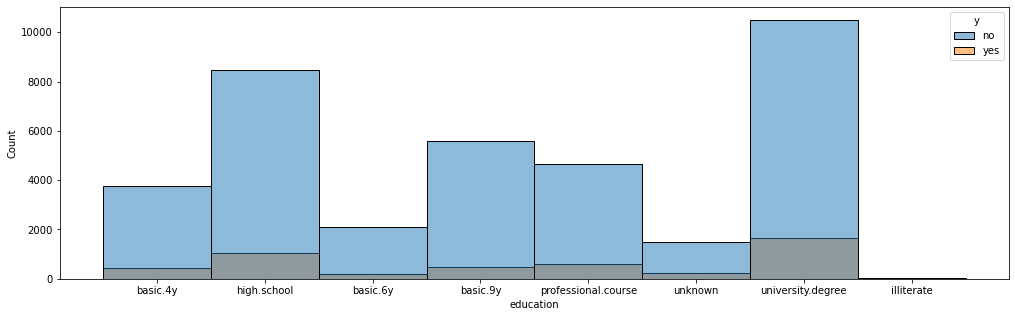

In [29]:
plt.figure(figsize=(17,5))
sns.histplot(x='education', hue='y', data=df)

In [30]:
education_grouped = df.groupby(['education', 'y'])['y'].count()
education_per = education_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [31]:
education_per.filter(like='yes').sort_values(ascending=False)

education            y  
illiterate           yes    22.222222
unknown              yes    14.500289
university.degree    yes    13.724523
professional.course  yes    11.348465
high.school          yes    10.835523
basic.4y             yes    10.249042
basic.6y             yes     8.202443
basic.9y             yes     7.824648
Name: y, dtype: float64

> According to the data, the illiterate category is more inclined to subscribe (we can nuance this result by the low volume of observations in this category)

> The percentage of subs is lower in basics categories

### Marital

<AxesSubplot:xlabel='marital', ylabel='Count'>

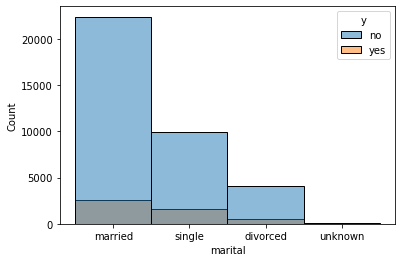

In [32]:

sns.histplot(x='marital', hue='y', data=df)

In [33]:
marital_grouped = df.groupby(['marital', 'y'])['y'].count()
marital_per = marital_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [34]:
marital_per.filter(like='yes').sort_values(ascending=False)

marital   y  
unknown   yes    15.000000
single    yes    14.004149
divorced  yes    10.320902
married   yes    10.157253
Name: y, dtype: float64

> The singles seems to be a little bit more interested in the subscription

### Outliers

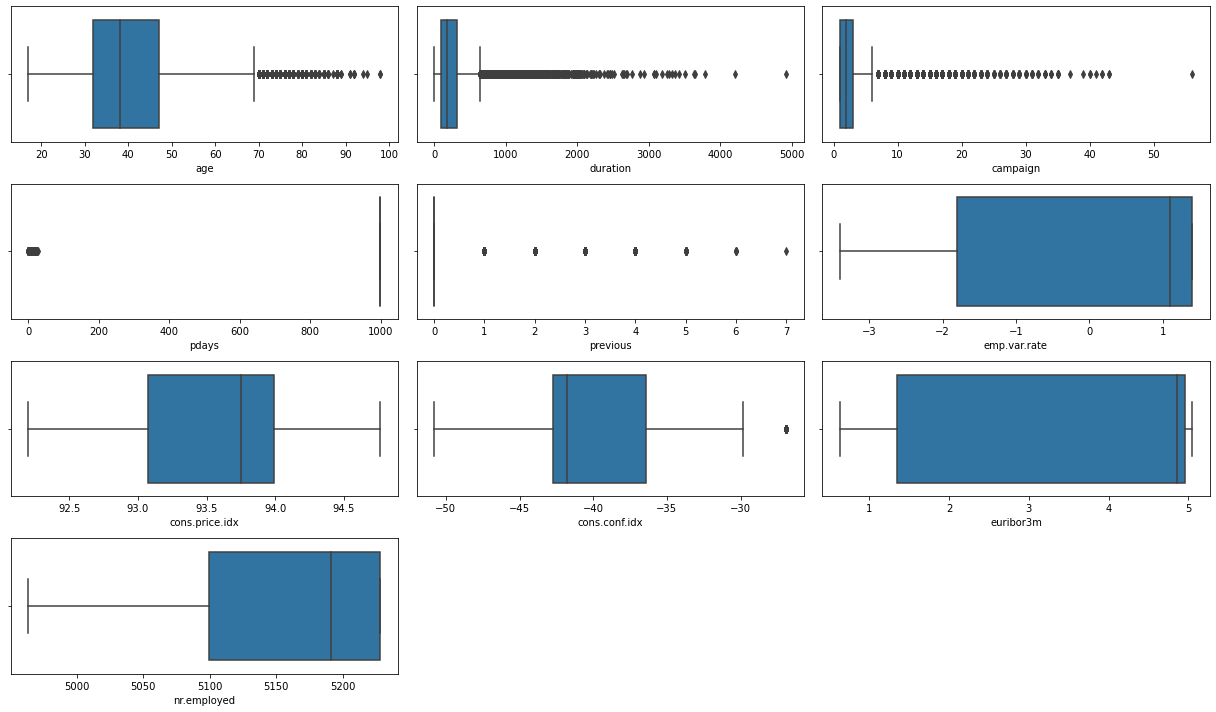

In [35]:
c = 1 
nrows = round(len(var_num.columns) / 3) + 1
fig = plt.figure(figsize=(17,10))
for i in var_num.columns:
    plt.subplot(nrows, 3, c)
    sns.boxplot(x=i, hue='y', data=df)
    c += 1 
plt.tight_layout()
plt.show()

I can identify some outliers which can make the model perform worse

Let's get rid of it

In [36]:
df[df['campaign'] > 50]

age     job  marital          education  default  housing     loan  \
4107   32  admin.  married  university.degree  unknown  unknown  unknown   

        contact month day_of_week  ...  pdays  previous     poutcome  \
4107  telephone   may         mon  ...    999         0  nonexistent   

      emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
4107           1.1         93.994          -36.4      4.858       5191.0  no   

      age_bins  
4107     25-34  

[1 rows x 22 columns]

In [37]:
df.drop(4107, inplace=True)

In [38]:
idx_to_drop = df[df['cons.conf.idx'] > -27].index

In [39]:
df.drop(idx_to_drop, inplace=True)

In [40]:
df.shape

(40740, 22)

# Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

The column 'age_bins' was for the purpose oh the analysis, we can now delete it

In [42]:
df.drop('age_bins', axis=1, inplace=True)

### Encode

In [43]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [44]:
for i in var_cat.columns:
    print(str(i) + ' : ' + str(var_cat[i].nunique())) 

job : 12
marital : 4
education : 8
default : 3
housing : 3
loan : 3
contact : 2
month : 10
day_of_week : 5
poutcome : 3
y : 2


We have low cardinality for categorical variables so we can apply one hot encoding

In [45]:
df = pd.get_dummies(df)

### Split 

In [46]:
df.drop('duration', axis=1, inplace=True)

In [47]:
X = df.copy()
y = X.pop('y')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=6)

### Balance

I now have to take care of the high imbalanced target

I'll use Smote which is an over sampling method based on k nearest neighbors

In [49]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
oversample = SMOTE()

In [52]:
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

### Scale

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [54]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, recall_score

According to our goal, we'll look at first at the recall as metrics. 

Indeed we want to avoid the false negatives which are for this campaign a missed opportunity.

In [56]:
estimators = [LogisticRegression(),
             RandomForestClassifier(),
             XGBClassifier(),
             LGBMClassifier(),
             CatBoostClassifier(verbose=0)]

In [57]:
for i in estimators:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(str(i) + ':\n' + str(classification_report(y_test, y_pred)))

C:\Users\riche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9070
           1       0.98      0.91      0.94      9070

    accuracy                           0.94     18140
   macro avg       0.95      0.94      0.94     18140
weighted avg       0.95      0.94      0.94     18140

RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9070
           1       0.96      0.88      0.91      9070

    accuracy                           0.92     18140
   macro avg       0.92      0.92      0.92     18140
weighted avg       0.92      0.92      0.92     18140

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min

The best result (recall score and accuracy) come with the light gbm classifier

I'll pursue with it 

### Hyperparamer tuning

In [72]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [58]:
import optuna
from optuna.samplers import TPESampler  

In [66]:
def objective(trial):
    param = {
        "objective": "binary",
        "verbosity": -1,
        "boosting_type": "gbdt",                
        "seed": 42,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    
    classifier = LGBMClassifier(**param)
    classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)
    y_pred = classifier.predict(X_test)  
    score = recall_score(y_test, y_pred)        
    return score 

In [67]:
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10000, timeout=1800) # Run for 30 minutes     
print("Number of completed trials: {}".format(len(study.trials)))   
print("Best trial:")
trial = study.best_trial      
     
print("\tBest Score: {}".format(trial.value))                                                                 
print("\tBest Params: ")           
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))   

[I 2022-01-14 13:11:51,800] A new study created in memory with name: no-name-cbe947fb-40b8-422a-90ce-436448bc53b6
[I 2022-01-14 13:11:54,583] Trial 0 finished with value: 0.9038588754134509 and parameters: {'lambda_l1': 8.084183941755323e-05, 'lambda_l2': 1.2098706396514047e-06, 'num_leaves': 427, 'feature_fraction': 0.8510690196703834, 'bagging_fraction': 0.8237492839215772, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 0 with value: 0.9038588754134509.
[I 2022-01-14 13:11:56,086] Trial 1 finished with value: 0.9013230429988974 and parameters: {'lambda_l1': 0.04685128664338508, 'lambda_l2': 1.5235893860040538e-06, 'num_leaves': 297, 'feature_fraction': 0.3374904537042963, 'bagging_fraction': 0.6734214948176308, 'bagging_freq': 3, 'min_child_samples': 29}. Best is trial 0 with value: 0.9038588754134509.
[I 2022-01-14 13:11:57,132] Trial 2 finished with value: 0.9076074972436604 and parameters: {'lambda_l1': 1.3503372790980939e-05, 'lambda_l2': 0.0019825386040315768, 'num_l

[I 2022-01-14 13:12:24,851] Trial 22 finished with value: 0.9051819184123484 and parameters: {'lambda_l1': 0.028961486975754538, 'lambda_l2': 0.12270314194797613, 'num_leaves': 505, 'feature_fraction': 0.9697546792742617, 'bagging_fraction': 0.6938590128186537, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 6 with value: 0.9098125689084895.
[I 2022-01-14 13:12:26,539] Trial 23 finished with value: 0.9051819184123484 and parameters: {'lambda_l1': 0.6848920613011648, 'lambda_l2': 0.0054279734552916455, 'num_leaves': 251, 'feature_fraction': 0.8389228601772928, 'bagging_fraction': 0.5452147889817622, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 6 with value: 0.9098125689084895.
[I 2022-01-14 13:12:27,965] Trial 24 finished with value: 0.909702315325248 and parameters: {'lambda_l1': 0.00026349435661312794, 'lambda_l2': 0.10452802955341003, 'num_leaves': 109, 'feature_fraction': 0.8894782296347783, 'bagging_fraction': 0.7539222410828217, 'bagging_freq': 1, 'min_chi

[I 2022-01-14 13:12:54,770] Trial 45 finished with value: 0.9124586549062844 and parameters: {'lambda_l1': 0.0038154061824179466, 'lambda_l2': 4.6543639936353947e-05, 'num_leaves': 135, 'feature_fraction': 0.9908620210696086, 'bagging_fraction': 0.7469908398173334, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:12:56,178] Trial 46 finished with value: 0.9127894156560088 and parameters: {'lambda_l1': 0.002864176586079237, 'lambda_l2': 4.872265232803455e-05, 'num_leaves': 132, 'feature_fraction': 0.9971374652530576, 'bagging_fraction': 0.7451836727205855, 'bagging_freq': 6, 'min_child_samples': 32}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:12:57,478] Trial 47 finished with value: 0.9100330760749724 and parameters: {'lambda_l1': 0.002534174360309818, 'lambda_l2': 5.0121605533503964e-05, 'num_leaves': 135, 'feature_fraction': 0.910674362643801, 'bagging_fraction': 0.7524062196129058, 'bagging_freq': 8,

[I 2022-01-14 13:13:27,770] Trial 68 finished with value: 0.9114663726571114 and parameters: {'lambda_l1': 0.3090996760008378, 'lambda_l2': 4.0061172258112195e-05, 'num_leaves': 66, 'feature_fraction': 0.9775647866029687, 'bagging_fraction': 0.8837520177327745, 'bagging_freq': 2, 'min_child_samples': 39}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:13:29,320] Trial 69 finished with value: 0.909702315325248 and parameters: {'lambda_l1': 0.063496319216038, 'lambda_l2': 0.00022705431855557016, 'num_leaves': 129, 'feature_fraction': 0.915633551510327, 'bagging_fraction': 0.7841577401901497, 'bagging_freq': 3, 'min_child_samples': 34}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:13:30,765] Trial 70 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.0008897624666175717, 'lambda_l2': 3.866744935188677e-06, 'num_leaves': 102, 'feature_fraction': 0.9989522337093919, 'bagging_fraction': 0.6574671170980871, 'bagging_freq': 7, 'min_c

[I 2022-01-14 13:13:55,197] Trial 91 finished with value: 0.9127894156560088 and parameters: {'lambda_l1': 0.03217244057625453, 'lambda_l2': 5.012242734933017e-05, 'num_leaves': 38, 'feature_fraction': 0.999777155402316, 'bagging_fraction': 0.9476472961305482, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:13:56,505] Trial 92 finished with value: 0.9114663726571114 and parameters: {'lambda_l1': 0.026174419595208498, 'lambda_l2': 5.679400071696387e-05, 'num_leaves': 36, 'feature_fraction': 0.9613674667114591, 'bagging_fraction': 0.9439382980823867, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:13:57,778] Trial 93 finished with value: 0.9098125689084895 and parameters: {'lambda_l1': 2.8779004987675356e-05, 'lambda_l2': 0.00011525904037012572, 'num_leaves': 54, 'feature_fraction': 0.9249726837661744, 'bagging_fraction': 0.9051279308049602, 'bagging_freq': 7, 'mi

[I 2022-01-14 13:14:27,198] Trial 114 finished with value: 0.9126791620727673 and parameters: {'lambda_l1': 0.0007249489426980884, 'lambda_l2': 1.308526569470268e-06, 'num_leaves': 92, 'feature_fraction': 0.996618787135214, 'bagging_fraction': 0.9244257031298253, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:14:28,577] Trial 115 finished with value: 0.909922822491731 and parameters: {'lambda_l1': 0.0007810800456419474, 'lambda_l2': 1.255526565053182e-06, 'num_leaves': 92, 'feature_fraction': 0.9656423723058003, 'bagging_fraction': 0.9236609007133896, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:14:30,122] Trial 116 finished with value: 0.9106945975744212 and parameters: {'lambda_l1': 0.002732177850778178, 'lambda_l2': 3.119850649668893e-05, 'num_leaves': 132, 'feature_fraction': 0.9977450500091772, 'bagging_fraction': 0.8624638644820177, 'bagging_freq': 5, 

[I 2022-01-14 13:14:56,961] Trial 137 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 0.029205589025085132, 'lambda_l2': 3.466939896077758e-06, 'num_leaves': 80, 'feature_fraction': 0.9349375273583772, 'bagging_fraction': 0.6429627069789767, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:14:58,127] Trial 138 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 0.009270218823923076, 'lambda_l2': 3.3499498796026e-05, 'num_leaves': 60, 'feature_fraction': 0.9635037777583211, 'bagging_fraction': 0.8409743842910674, 'bagging_freq': 5, 'min_child_samples': 23}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:14:59,610] Trial 139 finished with value: 0.9084895259095921 and parameters: {'lambda_l1': 6.425803278499196e-05, 'lambda_l2': 0.000466631163830479, 'num_leaves': 142, 'feature_fraction': 0.9244290101063064, 'bagging_fraction': 0.791954885969951, 'bagging_freq': 2, 'min

[I 2022-01-14 13:15:27,348] Trial 160 finished with value: 0.909922822491731 and parameters: {'lambda_l1': 0.001993822382095791, 'lambda_l2': 4.309439407510604e-06, 'num_leaves': 30, 'feature_fraction': 0.929323334972606, 'bagging_fraction': 0.8553078401438827, 'bagging_freq': 4, 'min_child_samples': 9}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:15:28,492] Trial 161 finished with value: 0.9112458654906285 and parameters: {'lambda_l1': 0.00022007960479586248, 'lambda_l2': 1.832780028188061e-05, 'num_leaves': 42, 'feature_fraction': 0.9527548537425803, 'bagging_fraction': 0.9597960858721336, 'bagging_freq': 7, 'min_child_samples': 22}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:15:29,549] Trial 162 finished with value: 0.906284454244763 and parameters: {'lambda_l1': 0.0035003031780672374, 'lambda_l2': 5.701531490244488e-05, 'num_leaves': 60, 'feature_fraction': 0.48779181232772, 'bagging_fraction': 0.9307565294205735, 'bagging_freq': 7, 'min

[I 2022-01-14 13:15:55,261] Trial 183 finished with value: 0.9114663726571114 and parameters: {'lambda_l1': 0.00020801764992568107, 'lambda_l2': 1.0103939293433995e-05, 'num_leaves': 70, 'feature_fraction': 0.9850080580690203, 'bagging_fraction': 0.9246667174053802, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:15:56,476] Trial 184 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 0.010248397537711031, 'lambda_l2': 5.236734150271442e-05, 'num_leaves': 54, 'feature_fraction': 0.9441772441610086, 'bagging_fraction': 0.8964684049196413, 'bagging_freq': 7, 'min_child_samples': 23}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:15:58,081] Trial 185 finished with value: 0.9079382579933848 and parameters: {'lambda_l1': 0.004854274854183088, 'lambda_l2': 0.41269127086605606, 'num_leaves': 187, 'feature_fraction': 0.9596060524976218, 'bagging_fraction': 0.8775422395741055, 'bagging_freq': 0, 

[I 2022-01-14 13:16:26,254] Trial 206 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 0.017806098405546627, 'lambda_l2': 0.773076006534294, 'num_leaves': 61, 'feature_fraction': 0.9821691175768003, 'bagging_fraction': 0.8782361617650211, 'bagging_freq': 3, 'min_child_samples': 28}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:16:27,611] Trial 207 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.02608400118287868, 'lambda_l2': 0.0071143178978412365, 'num_leaves': 40, 'feature_fraction': 0.9335927863957871, 'bagging_fraction': 0.9369671978494312, 'bagging_freq': 1, 'min_child_samples': 32}. Best is trial 29 with value: 0.9132304299889746.
[I 2022-01-14 13:16:28,769] Trial 208 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 0.0002909479013059692, 'lambda_l2': 6.691817255330366e-06, 'num_leaves': 26, 'feature_fraction': 0.9998969489216517, 'bagging_fraction': 0.9055009320068579, 'bagging_freq': 3, 'min_

[I 2022-01-14 13:16:52,617] Trial 229 finished with value: 0.9114663726571114 and parameters: {'lambda_l1': 0.000872257970515863, 'lambda_l2': 1.9454163876432115e-05, 'num_leaves': 45, 'feature_fraction': 0.9997114428367961, 'bagging_fraction': 0.7902241098247149, 'bagging_freq': 7, 'min_child_samples': 20}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:16:53,755] Trial 230 finished with value: 0.9076074972436604 and parameters: {'lambda_l1': 0.001719804450752596, 'lambda_l2': 5.702769235516875e-06, 'num_leaves': 65, 'feature_fraction': 0.671042068106429, 'bagging_fraction': 0.8589159499322666, 'bagging_freq': 4, 'min_child_samples': 27}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:16:54,769] Trial 231 finished with value: 0.9106945975744212 and parameters: {'lambda_l1': 0.001189004832106804, 'lambda_l2': 2.6421431314518277e-05, 'num_leaves': 28, 'feature_fraction': 0.9543358342116034, 'bagging_fraction': 0.7489550649178446, 'bagging_freq': 4

[I 2022-01-14 13:17:21,212] Trial 252 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.010934342277032837, 'lambda_l2': 5.103911614258348e-06, 'num_leaves': 78, 'feature_fraction': 0.9604467863843408, 'bagging_fraction': 0.8936792865071014, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:17:22,623] Trial 253 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 0.0065830905026943816, 'lambda_l2': 1.7389051957519547e-05, 'num_leaves': 35, 'feature_fraction': 0.9791701537741235, 'bagging_fraction': 0.9189460489244905, 'bagging_freq': 6, 'min_child_samples': 20}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:17:24,007] Trial 254 finished with value: 0.9100330760749724 and parameters: {'lambda_l1': 0.0028829926541277468, 'lambda_l2': 9.005105263386657e-06, 'num_leaves': 64, 'feature_fraction': 0.9470531506364592, 'bagging_fraction': 0.8313011865411661, 'bagging_freq':

[I 2022-01-14 13:17:53,055] Trial 274 finished with value: 0.9110253583241456 and parameters: {'lambda_l1': 0.005236282892332727, 'lambda_l2': 0.0005229726791334001, 'num_leaves': 77, 'feature_fraction': 0.9682384796383001, 'bagging_fraction': 0.9090023857934171, 'bagging_freq': 9, 'min_child_samples': 25}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:17:54,404] Trial 275 finished with value: 0.909922822491731 and parameters: {'lambda_l1': 0.003031074864468453, 'lambda_l2': 0.001014487976044813, 'num_leaves': 70, 'feature_fraction': 0.9205349935393089, 'bagging_fraction': 0.9487543429446315, 'bagging_freq': 7, 'min_child_samples': 14}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:17:55,553] Trial 276 finished with value: 0.9103638368246968 and parameters: {'lambda_l1': 5.878094306047815e-05, 'lambda_l2': 0.0013684363890779593, 'num_leaves': 38, 'feature_fraction': 0.8953353038814926, 'bagging_fraction': 0.8461353933322159, 'bagging_freq': 4, 

[I 2022-01-14 13:18:22,206] Trial 297 finished with value: 0.912348401323043 and parameters: {'lambda_l1': 0.0017644876450240287, 'lambda_l2': 5.750151491468927e-07, 'num_leaves': 76, 'feature_fraction': 0.9811184663726469, 'bagging_fraction': 0.7728472295710388, 'bagging_freq': 4, 'min_child_samples': 34}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:18:23,606] Trial 298 finished with value: 0.9110253583241456 and parameters: {'lambda_l1': 0.0015556501628008477, 'lambda_l2': 6.695055896932185e-07, 'num_leaves': 96, 'feature_fraction': 0.9838893840256706, 'bagging_fraction': 0.7584419780913633, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:18:25,738] Trial 299 finished with value: 0.9045203969128996 and parameters: {'lambda_l1': 0.0010584595538599007, 'lambda_l2': 4.908515646768742e-07, 'num_leaves': 273, 'feature_fraction': 0.9705409653466475, 'bagging_fraction': 0.7595276246686674, 'bagging_freq':

[I 2022-01-14 13:18:53,326] Trial 319 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 0.001049285374466167, 'lambda_l2': 3.555516311744894e-07, 'num_leaves': 89, 'feature_fraction': 0.9868671891367367, 'bagging_fraction': 0.7270864269397668, 'bagging_freq': 5, 'min_child_samples': 34}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:18:54,577] Trial 320 finished with value: 0.9131201764057332 and parameters: {'lambda_l1': 0.0006508053185529913, 'lambda_l2': 1.8760964251022043e-07, 'num_leaves': 81, 'feature_fraction': 0.9985476518720744, 'bagging_fraction': 0.7110900630438401, 'bagging_freq': 5, 'min_child_samples': 33}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:18:55,918] Trial 321 finished with value: 0.9112458654906285 and parameters: {'lambda_l1': 0.0008775859563948476, 'lambda_l2': 2.56174039504528e-07, 'num_leaves': 93, 'feature_fraction': 0.998759895710069, 'bagging_fraction': 0.7100586239680022, 'bagging_freq': 5

[I 2022-01-14 13:19:22,758] Trial 341 finished with value: 0.9128996692392503 and parameters: {'lambda_l1': 0.0006285497517778906, 'lambda_l2': 1.392900298565291e-07, 'num_leaves': 102, 'feature_fraction': 0.9816087068396377, 'bagging_fraction': 0.6950922115487663, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:19:24,155] Trial 342 finished with value: 0.9128996692392503 and parameters: {'lambda_l1': 0.0006086610710010385, 'lambda_l2': 1.9124093015995417e-07, 'num_leaves': 99, 'feature_fraction': 0.9993712729194342, 'bagging_fraction': 0.6948565722880081, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:19:25,704] Trial 343 finished with value: 0.9134509371554576 and parameters: {'lambda_l1': 0.0006399066041498571, 'lambda_l2': 1.971453069119377e-08, 'num_leaves': 101, 'feature_fraction': 0.9996013839464734, 'bagging_fraction': 0.686886050659019, 'bagging_freq

[I 2022-01-14 13:19:53,967] Trial 363 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 0.00039442296888829995, 'lambda_l2': 1.8470140461084665e-08, 'num_leaves': 100, 'feature_fraction': 0.959453564958793, 'bagging_fraction': 0.6590818935169869, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:19:55,210] Trial 364 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 0.00027648222381128096, 'lambda_l2': 8.374816637015058e-08, 'num_leaves': 107, 'feature_fraction': 0.9789975076350415, 'bagging_fraction': 0.693989793850081, 'bagging_freq': 13, 'min_child_samples': 47}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:19:56,427] Trial 365 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 0.000596957929616434, 'lambda_l2': 3.464855349196021e-08, 'num_leaves': 102, 'feature_fraction': 0.9999985429543503, 'bagging_fraction': 0.6841266513759123, 'bagging_fr

[I 2022-01-14 13:20:26,505] Trial 385 finished with value: 0.9103638368246968 and parameters: {'lambda_l1': 0.0008888268967626763, 'lambda_l2': 2.368478943888179e-07, 'num_leaves': 110, 'feature_fraction': 0.9995815162568525, 'bagging_fraction': 0.7274215699547022, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:20:28,105] Trial 386 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 0.0005669374314546403, 'lambda_l2': 5.326540153805295e-08, 'num_leaves': 142, 'feature_fraction': 0.9818814919689458, 'bagging_fraction': 0.7306409272619391, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:20:29,280] Trial 387 finished with value: 0.9044101433296582 and parameters: {'lambda_l1': 0.00022681090099966187, 'lambda_l2': 2.033940223994702e-06, 'num_leaves': 98, 'feature_fraction': 0.5757431821030781, 'bagging_fraction': 0.6636257576234443, 'bagging_fre

[I 2022-01-14 13:20:59,681] Trial 407 finished with value: 0.9110253583241456 and parameters: {'lambda_l1': 0.0004245938700792967, 'lambda_l2': 1.5198426906696176e-07, 'num_leaves': 147, 'feature_fraction': 0.984644645430741, 'bagging_fraction': 0.6828746492864197, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:21:00,923] Trial 408 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.00020746015412515637, 'lambda_l2': 8.434233589033221e-08, 'num_leaves': 72, 'feature_fraction': 0.9631330564057813, 'bagging_fraction': 0.6924947584099657, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:21:02,266] Trial 409 finished with value: 0.9130099228224917 and parameters: {'lambda_l1': 0.0008209687518773972, 'lambda_l2': 6.330347404944099e-08, 'num_leaves': 97, 'feature_fraction': 0.9805178268370718, 'bagging_fraction': 0.7050361136567709, 'bagging_freq

[I 2022-01-14 13:21:30,437] Trial 429 finished with value: 0.9110253583241456 and parameters: {'lambda_l1': 0.00026796176935725904, 'lambda_l2': 1.2801444233359017e-07, 'num_leaves': 118, 'feature_fraction': 0.9647262985315103, 'bagging_fraction': 0.6973404625531098, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:21:31,894] Trial 430 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 0.0014320232093972102, 'lambda_l2': 1.3001484872874831e-08, 'num_leaves': 104, 'feature_fraction': 0.9840500337007243, 'bagging_fraction': 0.7366990001598082, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:21:33,255] Trial 431 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 0.000878018778157516, 'lambda_l2': 2.8159070434045805e-08, 'num_leaves': 97, 'feature_fraction': 0.9676141432256307, 'bagging_fraction': 0.7190149995620897, 'bagging_f

[I 2022-01-14 13:22:02,888] Trial 451 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.0015521973455539862, 'lambda_l2': 1.1777236568108983e-07, 'num_leaves': 137, 'feature_fraction': 0.9651839580037088, 'bagging_fraction': 0.7518423656576214, 'bagging_freq': 6, 'min_child_samples': 56}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:22:04,347] Trial 452 finished with value: 0.9132304299889746 and parameters: {'lambda_l1': 0.0012846202320867376, 'lambda_l2': 2.658683620684551e-07, 'num_leaves': 77, 'feature_fraction': 0.9812004349139709, 'bagging_fraction': 0.7293705641673858, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:22:05,675] Trial 453 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.0009143860947443215, 'lambda_l2': 2.954412720143327e-07, 'num_leaves': 74, 'feature_fraction': 0.9475169541496018, 'bagging_fraction': 0.7238245815068387, 'bagging_freq

[I 2022-01-14 13:22:32,972] Trial 473 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 0.0004158358526764871, 'lambda_l2': 1.4989987999918973e-08, 'num_leaves': 72, 'feature_fraction': 0.9483061311409609, 'bagging_fraction': 0.6799301567003767, 'bagging_freq': 10, 'min_child_samples': 61}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:22:34,117] Trial 474 finished with value: 0.9112458654906285 and parameters: {'lambda_l1': 0.00020849853857825146, 'lambda_l2': 1.0187360322794389e-08, 'num_leaves': 79, 'feature_fraction': 0.958990606956897, 'bagging_fraction': 0.4862896199957512, 'bagging_freq': 5, 'min_child_samples': 65}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:22:36,647] Trial 475 finished with value: 0.9063947078280045 and parameters: {'lambda_l1': 0.00034285562597736286, 'lambda_l2': 0.011072896968703795, 'num_leaves': 490, 'feature_fraction': 0.9651887023726783, 'bagging_fraction': 0.7138164097780073, 'bagging_fr

[I 2022-01-14 13:23:04,915] Trial 495 finished with value: 0.9109151047409041 and parameters: {'lambda_l1': 0.00010085810391942076, 'lambda_l2': 1.013377769599683e-08, 'num_leaves': 71, 'feature_fraction': 0.9669176116524101, 'bagging_fraction': 0.5717276410340513, 'bagging_freq': 5, 'min_child_samples': 67}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:23:05,925] Trial 496 finished with value: 0.9120176405733186 and parameters: {'lambda_l1': 0.0010187935650672192, 'lambda_l2': 2.092978287373308e-08, 'num_leaves': 58, 'feature_fraction': 0.9515690884270211, 'bagging_fraction': 0.44830783379213285, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:23:07,225] Trial 497 finished with value: 0.9109151047409041 and parameters: {'lambda_l1': 0.00015509097451026115, 'lambda_l2': 1.4301801670615286e-08, 'num_leaves': 79, 'feature_fraction': 0.9722299304025163, 'bagging_fraction': 0.7337465064113714, 'bagging_fr

[I 2022-01-14 13:23:34,979] Trial 517 finished with value: 0.9103638368246968 and parameters: {'lambda_l1': 0.00013480234348875838, 'lambda_l2': 1.0015589105212229e-08, 'num_leaves': 60, 'feature_fraction': 0.9355289609901457, 'bagging_fraction': 0.7289364134583385, 'bagging_freq': 11, 'min_child_samples': 72}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:23:36,245] Trial 518 finished with value: 0.9120176405733186 and parameters: {'lambda_l1': 0.0013298297935674986, 'lambda_l2': 2.9755235279507832e-08, 'num_leaves': 87, 'feature_fraction': 0.966688410254337, 'bagging_fraction': 0.7151804295909072, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:23:37,393] Trial 519 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 0.00026053671246966444, 'lambda_l2': 1.924466184971624e-08, 'num_leaves': 55, 'feature_fraction': 0.9493748014574009, 'bagging_fraction': 0.6844092974890896, 'bagging_fr

[I 2022-01-14 13:24:05,056] Trial 539 finished with value: 0.9095920617420066 and parameters: {'lambda_l1': 0.00013876067880922363, 'lambda_l2': 8.994369641942377e-08, 'num_leaves': 118, 'feature_fraction': 0.9820073109062466, 'bagging_fraction': 0.7169836624686281, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:24:06,482] Trial 540 finished with value: 0.9120176405733186 and parameters: {'lambda_l1': 0.0008084604518525045, 'lambda_l2': 2.8353746521641626e-08, 'num_leaves': 53, 'feature_fraction': 0.9674695518618937, 'bagging_fraction': 0.7031247088190132, 'bagging_freq': 5, 'min_child_samples': 55}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:24:07,897] Trial 541 finished with value: 0.9124586549062844 and parameters: {'lambda_l1': 9.048405136966664e-05, 'lambda_l2': 1.1725105596820995e-07, 'num_leaves': 81, 'feature_fraction': 0.9991967240768179, 'bagging_fraction': 0.7161592358564736, 'bagging_fr

[I 2022-01-14 13:24:33,699] Trial 561 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 0.0009768444290036082, 'lambda_l2': 3.462270643402341e-08, 'num_leaves': 86, 'feature_fraction': 0.9846554184781228, 'bagging_fraction': 0.6831044936985081, 'bagging_freq': 5, 'min_child_samples': 54}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:24:35,141] Trial 562 finished with value: 0.9089305402425579 and parameters: {'lambda_l1': 2.2347511689366508e-05, 'lambda_l2': 4.037389647562622e-08, 'num_leaves': 111, 'feature_fraction': 0.9692963979193955, 'bagging_fraction': 0.6965568526189825, 'bagging_freq': 8, 'min_child_samples': 57}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:24:36,533] Trial 563 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 0.0006659378894039042, 'lambda_l2': 1.1001974341020781e-07, 'num_leaves': 97, 'feature_fraction': 0.9692896285473813, 'bagging_fraction': 0.7001891545095453, 'bagging_fre

[I 2022-01-14 13:25:05,753] Trial 583 finished with value: 0.9124586549062844 and parameters: {'lambda_l1': 3.735476003273312e-05, 'lambda_l2': 3.649403815304214e-08, 'num_leaves': 79, 'feature_fraction': 0.9817683686652369, 'bagging_fraction': 0.7332026645666352, 'bagging_freq': 6, 'min_child_samples': 73}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:25:07,235] Trial 584 finished with value: 0.9106945975744212 and parameters: {'lambda_l1': 0.00048575809035098546, 'lambda_l2': 1.158417487020888e-07, 'num_leaves': 105, 'feature_fraction': 0.9509906038455948, 'bagging_fraction': 0.6806229795020797, 'bagging_freq': 5, 'min_child_samples': 48}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:25:08,735] Trial 585 finished with value: 0.9119073869900772 and parameters: {'lambda_l1': 0.0009645747343726706, 'lambda_l2': 2.9323516426153532e-08, 'num_leaves': 112, 'feature_fraction': 0.9680344251553117, 'bagging_fraction': 0.6933177209117546, 'bagging_fr

[I 2022-01-14 13:25:32,618] Trial 605 finished with value: 0.909922822491731 and parameters: {'lambda_l1': 0.00022875920201404344, 'lambda_l2': 1.763987211831517e-08, 'num_leaves': 61, 'feature_fraction': 0.9181471870637469, 'bagging_fraction': 0.28989728242118457, 'bagging_freq': 5, 'min_child_samples': 83}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:25:34,217] Trial 606 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 4.080243331557947e-05, 'lambda_l2': 1.4269222069093281e-08, 'num_leaves': 170, 'feature_fraction': 0.9851841557952319, 'bagging_fraction': 0.530008555419645, 'bagging_freq': 6, 'min_child_samples': 71}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:25:35,213] Trial 607 finished with value: 0.9120176405733186 and parameters: {'lambda_l1': 0.0013168353312723229, 'lambda_l2': 0.0002501202918937921, 'num_leaves': 76, 'feature_fraction': 0.9494996291154937, 'bagging_fraction': 0.24227448789009556, 'bagging_fre

[I 2022-01-14 13:26:01,397] Trial 627 finished with value: 0.9100330760749724 and parameters: {'lambda_l1': 0.00032180790666895846, 'lambda_l2': 3.7532158895597104e-08, 'num_leaves': 123, 'feature_fraction': 0.9563843904534377, 'bagging_fraction': 0.664022573749029, 'bagging_freq': 12, 'min_child_samples': 50}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:26:02,409] Trial 628 finished with value: 0.9070562293274531 and parameters: {'lambda_l1': 5.428837185655404e-05, 'lambda_l2': 6.452478448951166e-08, 'num_leaves': 56, 'feature_fraction': 0.7329875928521324, 'bagging_fraction': 0.34705959075631665, 'bagging_freq': 7, 'min_child_samples': 39}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:26:03,515] Trial 629 finished with value: 0.9061742006615215 and parameters: {'lambda_l1': 0.0006151398421692118, 'lambda_l2': 2.6228918150655358e-08, 'num_leaves': 86, 'feature_fraction': 0.47800099742746693, 'bagging_fraction': 0.6251725448088976, 'bagging_

[I 2022-01-14 13:26:29,795] Trial 649 finished with value: 0.9079382579933848 and parameters: {'lambda_l1': 2.894323506972709e-05, 'lambda_l2': 1.4682316938618054e-08, 'num_leaves': 86, 'feature_fraction': 0.8196608010500529, 'bagging_fraction': 0.7488650274267177, 'bagging_freq': 7, 'min_child_samples': 69}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:26:31,123] Trial 650 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 1.6098160043970515e-05, 'lambda_l2': 2.004657424836036e-08, 'num_leaves': 77, 'feature_fraction': 0.9588358456307177, 'bagging_fraction': 0.7460335166905843, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:26:32,655] Trial 651 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 1.738750866326446e-05, 'lambda_l2': 1.3643422663596806e-08, 'num_leaves': 90, 'feature_fraction': 0.9712670952962928, 'bagging_fraction': 0.7727847617680126, 'bagging_fre

[I 2022-01-14 13:26:57,051] Trial 671 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 3.6558049963195004e-05, 'lambda_l2': 1.9100626664414927e-08, 'num_leaves': 61, 'feature_fraction': 0.9063096451022057, 'bagging_fraction': 0.6831407349582488, 'bagging_freq': 15, 'min_child_samples': 65}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:26:58,153] Trial 672 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 3.1323880313961e-05, 'lambda_l2': 3.815405972338288e-08, 'num_leaves': 37, 'feature_fraction': 0.9735358155562948, 'bagging_fraction': 0.7405241939519268, 'bagging_freq': 14, 'min_child_samples': 68}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:27:00,307] Trial 673 finished with value: 0.9067254685777287 and parameters: {'lambda_l1': 1.7188920015222248e-05, 'lambda_l2': 2.040405695666359e-08, 'num_leaves': 305, 'feature_fraction': 0.9675608536254819, 'bagging_fraction': 0.6711898301171764, 'bagging_fr

[I 2022-01-14 13:27:27,667] Trial 693 finished with value: 0.9031973539140022 and parameters: {'lambda_l1': 9.519379801342919e-05, 'lambda_l2': 5.4314625994710246e-08, 'num_leaves': 88, 'feature_fraction': 0.6939772477009974, 'bagging_fraction': 0.43216801378307257, 'bagging_freq': 14, 'min_child_samples': 60}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:27:29,241] Trial 694 finished with value: 0.9127894156560088 and parameters: {'lambda_l1': 0.00013541190885159185, 'lambda_l2': 9.439232300211273e-08, 'num_leaves': 110, 'feature_fraction': 0.9868876284936824, 'bagging_fraction': 0.7093589619183958, 'bagging_freq': 5, 'min_child_samples': 74}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:27:30,280] Trial 695 finished with value: 0.9029768467475193 and parameters: {'lambda_l1': 0.00019171634229285612, 'lambda_l2': 1.0032576018101698e-08, 'num_leaves': 102, 'feature_fraction': 0.42153243145773445, 'bagging_fraction': 0.6855712906350263, 'baggi

[I 2022-01-14 13:27:55,263] Trial 715 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 9.553878275010451e-05, 'lambda_l2': 0.01613968098977932, 'num_leaves': 58, 'feature_fraction': 0.9773433391862137, 'bagging_fraction': 0.3542372427996304, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:27:56,476] Trial 716 finished with value: 0.9093715545755237 and parameters: {'lambda_l1': 0.00012423778860600642, 'lambda_l2': 4.249179283692619e-08, 'num_leaves': 71, 'feature_fraction': 0.9568700378570153, 'bagging_fraction': 0.7567290371537159, 'bagging_freq': 14, 'min_child_samples': 65}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:27:58,766] Trial 717 finished with value: 0.9055126791620728 and parameters: {'lambda_l1': 0.00010106878648007523, 'lambda_l2': 3.056423382490213e-08, 'num_leaves': 367, 'feature_fraction': 0.9226992844463073, 'bagging_fraction': 0.5877917776688432, 'bagging_freq'

[I 2022-01-14 13:28:27,196] Trial 737 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 7.478763692887905e-05, 'lambda_l2': 1.3878320992875101e-08, 'num_leaves': 91, 'feature_fraction': 0.8855227663423504, 'bagging_fraction': 0.6113501979928508, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:28:28,825] Trial 738 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 1.1853705980337097e-05, 'lambda_l2': 1.1472108277084098e-07, 'num_leaves': 114, 'feature_fraction': 0.9837656804055354, 'bagging_fraction': 0.7589741699318286, 'bagging_freq': 2, 'min_child_samples': 68}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:28:30,390] Trial 739 finished with value: 0.912348401323043 and parameters: {'lambda_l1': 0.0002692812766373965, 'lambda_l2': 1.0617766498257808e-08, 'num_leaves': 101, 'feature_fraction': 0.9573571238112849, 'bagging_fraction': 0.6923272094271367, 'bagging_f

[I 2022-01-14 13:28:56,275] Trial 759 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 0.00043801607839349255, 'lambda_l2': 2.162562111459817e-08, 'num_leaves': 157, 'feature_fraction': 0.9998734867792953, 'bagging_fraction': 0.7126659003769752, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:28:57,728] Trial 760 finished with value: 0.9119073869900772 and parameters: {'lambda_l1': 5.276960973270619e-05, 'lambda_l2': 1.0181788838652335e-08, 'num_leaves': 78, 'feature_fraction': 0.9643946137777346, 'bagging_fraction': 0.7553602433242285, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:28:59,288] Trial 761 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 9.473274914755747e-05, 'lambda_l2': 4.63742965455313e-08, 'num_leaves': 118, 'feature_fraction': 0.9709705771699935, 'bagging_fraction': 0.8377124696236833, 'bagging_fre

[I 2022-01-14 13:29:27,710] Trial 781 finished with value: 0.9119073869900772 and parameters: {'lambda_l1': 4.7540724364443165e-05, 'lambda_l2': 2.6319961394310196e-08, 'num_leaves': 97, 'feature_fraction': 0.9282070551952086, 'bagging_fraction': 0.8548986417678665, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:29:29,231] Trial 782 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 7.283711760688682e-05, 'lambda_l2': 1.490563851564631e-08, 'num_leaves': 85, 'feature_fraction': 0.942357888988096, 'bagging_fraction': 0.8249544632343454, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:29:30,609] Trial 783 finished with value: 0.9113561190738699 and parameters: {'lambda_l1': 3.1675178299071224e-05, 'lambda_l2': 2.3410224048796878e-08, 'num_leaves': 70, 'feature_fraction': 0.9703434950555605, 'bagging_fraction': 0.7672815031845603, 'bagging_fre

[I 2022-01-14 13:29:56,492] Trial 803 finished with value: 0.91212789415656 and parameters: {'lambda_l1': 0.0003097292369434489, 'lambda_l2': 2.8468981590326757e-08, 'num_leaves': 70, 'feature_fraction': 0.9650568169743999, 'bagging_fraction': 0.72356370282574, 'bagging_freq': 5, 'min_child_samples': 20}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:29:57,604] Trial 804 finished with value: 0.9091510474090408 and parameters: {'lambda_l1': 2.817062656423984e-05, 'lambda_l2': 0.044326161512942816, 'num_leaves': 72, 'feature_fraction': 0.9493794458374321, 'bagging_fraction': 0.4342119267584382, 'bagging_freq': 7, 'min_child_samples': 75}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:29:58,868] Trial 805 finished with value: 0.9127894156560088 and parameters: {'lambda_l1': 0.00025087268779763045, 'lambda_l2': 0.003524171760071348, 'num_leaves': 96, 'feature_fraction': 0.9815125518885449, 'bagging_fraction': 0.40682073884339714, 'bagging_freq': 5,

[I 2022-01-14 13:30:28,997] Trial 825 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 4.8896204418103085e-05, 'lambda_l2': 1.0611539636214902e-08, 'num_leaves': 86, 'feature_fraction': 0.9138026796483676, 'bagging_fraction': 0.6365786726336863, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:30:30,139] Trial 826 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 1.716018608208604e-05, 'lambda_l2': 1.4133979009145374e-08, 'num_leaves': 79, 'feature_fraction': 0.9447664160047498, 'bagging_fraction': 0.39208813656346114, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 211 with value: 0.9145534729878722.
[I 2022-01-14 13:30:31,388] Trial 827 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 0.0009289570567122276, 'lambda_l2': 1.7232666270930032e-08, 'num_leaves': 66, 'feature_fraction': 0.9356636090077313, 'bagging_fraction': 0.7374231159985862, 'bagging_fr

[I 2022-01-14 13:30:52,622] Trial 848 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 0.07680546528147607, 'lambda_l2': 0.02983436654176649, 'num_leaves': 24, 'feature_fraction': 0.9838829868039821, 'bagging_fraction': 0.3186822921500071, 'bagging_freq': 6, 'min_child_samples': 15}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:30:54,363] Trial 849 finished with value: 0.907497243660419 and parameters: {'lambda_l1': 0.021056065507488786, 'lambda_l2': 0.07419005084071134, 'num_leaves': 321, 'feature_fraction': 0.9724539694039116, 'bagging_fraction': 0.3188983188882416, 'bagging_freq': 5, 'min_child_samples': 27}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:30:54,963] Trial 850 finished with value: 0.9038588754134509 and parameters: {'lambda_l1': 0.12088821739834152, 'lambda_l2': 0.01400872927302617, 'num_leaves': 7, 'feature_fraction': 0.9849102523990528, 'bagging_fraction': 0.3627438391065267, 'bagging_freq': 5, 'min_chi

[I 2022-01-14 13:31:13,806] Trial 871 finished with value: 0.9095920617420066 and parameters: {'lambda_l1': 0.05469194375183753, 'lambda_l2': 0.035375385000197566, 'num_leaves': 20, 'feature_fraction': 0.9056564478053949, 'bagging_fraction': 0.3513107951695824, 'bagging_freq': 5, 'min_child_samples': 25}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:31:14,669] Trial 872 finished with value: 0.9119073869900772 and parameters: {'lambda_l1': 0.03406269295512639, 'lambda_l2': 0.09705368963119464, 'num_leaves': 46, 'feature_fraction': 0.9274789650391754, 'bagging_fraction': 0.33742402256847925, 'bagging_freq': 4, 'min_child_samples': 27}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:31:15,718] Trial 873 finished with value: 0.9088202866593165 and parameters: {'lambda_l1': 0.14725595712764764, 'lambda_l2': 0.07218480802013726, 'num_leaves': 57, 'feature_fraction': 0.9591431604805752, 'bagging_fraction': 0.366075553994635, 'bagging_freq': 6, 'min_ch

[I 2022-01-14 13:31:37,790] Trial 894 finished with value: 0.9084895259095921 and parameters: {'lambda_l1': 0.012832453364519018, 'lambda_l2': 0.08307138876458747, 'num_leaves': 83, 'feature_fraction': 0.17443613737447883, 'bagging_fraction': 0.29212581189200093, 'bagging_freq': 5, 'min_child_samples': 28}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:31:38,880] Trial 895 finished with value: 0.9128996692392503 and parameters: {'lambda_l1': 0.026685386097038372, 'lambda_l2': 0.08973517444769635, 'num_leaves': 34, 'feature_fraction': 0.9999250298863257, 'bagging_fraction': 0.33438225150990275, 'bagging_freq': 5, 'min_child_samples': 25}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:31:40,053] Trial 896 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 0.03888881586864794, 'lambda_l2': 0.04812799240948112, 'num_leaves': 87, 'feature_fraction': 0.9831648911901366, 'bagging_fraction': 0.30058214439553377, 'bagging_freq': 7, 'm

[I 2022-01-14 13:32:03,404] Trial 917 finished with value: 0.9093715545755237 and parameters: {'lambda_l1': 0.02344892374671844, 'lambda_l2': 0.06644085574470532, 'num_leaves': 57, 'feature_fraction': 0.9328591189135018, 'bagging_fraction': 0.8626792068545979, 'bagging_freq': 3, 'min_child_samples': 28}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:32:04,362] Trial 918 finished with value: 0.9094818081587651 and parameters: {'lambda_l1': 0.001267911670282093, 'lambda_l2': 1.308795504034168e-08, 'num_leaves': 82, 'feature_fraction': 0.9822745384787714, 'bagging_fraction': 0.18451770378063248, 'bagging_freq': 5, 'min_child_samples': 63}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:32:05,436] Trial 919 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 4.291137529567092e-05, 'lambda_l2': 0.006467149107284887, 'num_leaves': 94, 'feature_fraction': 0.9587248462277264, 'bagging_fraction': 0.3697063231018436, 'bagging_freq': 14, 

[I 2022-01-14 13:32:29,874] Trial 940 finished with value: 0.9131201764057332 and parameters: {'lambda_l1': 2.401046505030943e-06, 'lambda_l2': 0.16284837158222568, 'num_leaves': 48, 'feature_fraction': 0.944032459746433, 'bagging_fraction': 0.32934529002367846, 'bagging_freq': 4, 'min_child_samples': 24}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:32:31,101] Trial 941 finished with value: 0.9082690187431092 and parameters: {'lambda_l1': 0.00171115249884156, 'lambda_l2': 1.0148689156862773e-08, 'num_leaves': 81, 'feature_fraction': 0.772805335101944, 'bagging_fraction': 0.7630915124932621, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:32:32,337] Trial 942 finished with value: 0.9071664829106946 and parameters: {'lambda_l1': 1.5313052087976913e-07, 'lambda_l2': 1.862732100892562e-08, 'num_leaves': 194, 'feature_fraction': 0.9852310894025896, 'bagging_fraction': 0.25723301969848034, 'bagging_freq': 

[I 2022-01-14 13:32:58,149] Trial 962 finished with value: 0.907276736493936 and parameters: {'lambda_l1': 1.2315125081963585e-07, 'lambda_l2': 0.0337014859427301, 'num_leaves': 120, 'feature_fraction': 0.5577143820706575, 'bagging_fraction': 0.3544736070396556, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:32:59,336] Trial 963 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 1.9212774096778777e-06, 'lambda_l2': 0.02761411882069226, 'num_leaves': 104, 'feature_fraction': 0.9580376432671569, 'bagging_fraction': 0.3860644306247035, 'bagging_freq': 5, 'min_child_samples': 39}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:33:00,554] Trial 964 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 5.038490410778005e-08, 'lambda_l2': 0.021020910962626628, 'num_leaves': 112, 'feature_fraction': 0.983939808434115, 'bagging_fraction': 0.3409477637243672, 'bagging_freq': 6,

[I 2022-01-14 13:33:25,384] Trial 984 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 1.235845285549962e-08, 'lambda_l2': 0.019875190331434717, 'num_leaves': 235, 'feature_fraction': 0.9997872872609606, 'bagging_fraction': 0.3805825220854768, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:33:26,627] Trial 985 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 1.0369164753422515e-08, 'lambda_l2': 0.04241150246831546, 'num_leaves': 101, 'feature_fraction': 0.9819800855856737, 'bagging_fraction': 0.42371690010878216, 'bagging_freq': 6, 'min_child_samples': 46}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:33:27,905] Trial 986 finished with value: 0.9067254685777287 and parameters: {'lambda_l1': 9.71767217606751e-08, 'lambda_l2': 0.028203226737940016, 'num_leaves': 137, 'feature_fraction': 0.9663562899390878, 'bagging_fraction': 0.3067891052501538, 'bagging_freq':

[I 2022-01-14 13:33:52,726] Trial 1006 finished with value: 0.9125689084895259 and parameters: {'lambda_l1': 1.869861725220852e-08, 'lambda_l2': 1.8080119800908005e-08, 'num_leaves': 109, 'feature_fraction': 0.9217750822157388, 'bagging_fraction': 0.3934415323889655, 'bagging_freq': 5, 'min_child_samples': 69}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:33:54,228] Trial 1007 finished with value: 0.909702315325248 and parameters: {'lambda_l1': 1.9484736421919685e-08, 'lambda_l2': 1.5622080564424327e-08, 'num_leaves': 119, 'feature_fraction': 0.9473034084513158, 'bagging_fraction': 0.34594102472288213, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:33:55,529] Trial 1008 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 1.0238158282240602e-08, 'lambda_l2': 3.680539068535841e-08, 'num_leaves': 102, 'feature_fraction': 0.9706588640332723, 'bagging_fraction': 0.3786339417440167, 'bagg

[I 2022-01-14 13:34:19,978] Trial 1028 finished with value: 0.908710033076075 and parameters: {'lambda_l1': 2.459130409670679e-08, 'lambda_l2': 0.3072902853663247, 'num_leaves': 263, 'feature_fraction': 0.9534617589792009, 'bagging_fraction': 0.4031166348018272, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:34:21,160] Trial 1029 finished with value: 0.9141124586549063 and parameters: {'lambda_l1': 2.1979391560118817e-08, 'lambda_l2': 0.6005007904682583, 'num_leaves': 72, 'feature_fraction': 0.9597248434942831, 'bagging_fraction': 0.3588267165456653, 'bagging_freq': 5, 'min_child_samples': 69}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:34:22,263] Trial 1030 finished with value: 0.9126791620727673 and parameters: {'lambda_l1': 1.7572368030761873e-08, 'lambda_l2': 0.48978533656172063, 'num_leaves': 70, 'feature_fraction': 0.9012992520497236, 'bagging_fraction': 0.34426564608161964, 'bagging_freq': 5

[I 2022-01-14 13:34:44,183] Trial 1050 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 4.587686241854909e-08, 'lambda_l2': 0.3805359120879315, 'num_leaves': 45, 'feature_fraction': 0.9009670769739782, 'bagging_fraction': 0.3575040828074319, 'bagging_freq': 5, 'min_child_samples': 74}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:34:45,189] Trial 1051 finished with value: 0.913561190738699 and parameters: {'lambda_l1': 2.282026001134958e-08, 'lambda_l2': 0.9977855031417509, 'num_leaves': 64, 'feature_fraction': 0.9278128984883349, 'bagging_fraction': 0.33635230098521157, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:34:46,080] Trial 1052 finished with value: 0.9124586549062844 and parameters: {'lambda_l1': 2.6371700411700172e-08, 'lambda_l2': 0.6442033487559717, 'num_leaves': 50, 'feature_fraction': 0.8883763198607106, 'bagging_fraction': 0.3385946257149546, 'bagging_freq': 5, '

[I 2022-01-14 13:35:06,959] Trial 1073 finished with value: 0.9144432194046307 and parameters: {'lambda_l1': 2.1361563601437947e-08, 'lambda_l2': 0.36286559156657916, 'num_leaves': 43, 'feature_fraction': 0.9210643706069559, 'bagging_fraction': 0.3207867350657296, 'bagging_freq': 5, 'min_child_samples': 74}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:07,809] Trial 1074 finished with value: 0.9102535832414553 and parameters: {'lambda_l1': 1.8635180778232427e-08, 'lambda_l2': 0.39077960589710925, 'num_leaves': 27, 'feature_fraction': 0.8665149025841494, 'bagging_fraction': 0.35640889528001524, 'bagging_freq': 4, 'min_child_samples': 74}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:08,567] Trial 1075 finished with value: 0.9091510474090408 and parameters: {'lambda_l1': 4.6460848847688835e-08, 'lambda_l2': 0.34936140683111583, 'num_leaves': 14, 'feature_fraction': 0.9017886081968579, 'bagging_fraction': 0.32010118095300066, 'bagging_freq

[I 2022-01-14 13:35:29,171] Trial 1096 finished with value: 0.91212789415656 and parameters: {'lambda_l1': 2.4363917952470565e-08, 'lambda_l2': 0.470229475745828, 'num_leaves': 46, 'feature_fraction': 0.8960073361294099, 'bagging_fraction': 0.32456749373370325, 'bagging_freq': 5, 'min_child_samples': 81}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:30,157] Trial 1097 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 1.0398308603665696e-08, 'lambda_l2': 0.6047495652981879, 'num_leaves': 52, 'feature_fraction': 0.9278668975164683, 'bagging_fraction': 0.34864022768171316, 'bagging_freq': 4, 'min_child_samples': 68}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:31,114] Trial 1098 finished with value: 0.9122381477398015 and parameters: {'lambda_l1': 1.7131090485393096e-08, 'lambda_l2': 0.3145136329720477, 'num_leaves': 43, 'feature_fraction': 0.9033001540912406, 'bagging_fraction': 0.36867493853310696, 'bagging_freq': 5,

[I 2022-01-14 13:35:49,332] Trial 1119 finished with value: 0.9098125689084895 and parameters: {'lambda_l1': 5.021152257969251e-08, 'lambda_l2': 0.6666775845050051, 'num_leaves': 45, 'feature_fraction': 0.896041820686508, 'bagging_fraction': 0.3631050492946901, 'bagging_freq': 6, 'min_child_samples': 66}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:50,198] Trial 1120 finished with value: 0.9127894156560088 and parameters: {'lambda_l1': 3.1676506847245984e-08, 'lambda_l2': 0.48172936051211984, 'num_leaves': 37, 'feature_fraction': 0.9367607760712537, 'bagging_fraction': 0.33217572780169863, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 834 with value: 0.9153252480705623.
[I 2022-01-14 13:35:51,165] Trial 1121 finished with value: 0.91212789415656 and parameters: {'lambda_l1': 1.376600332201666e-08, 'lambda_l2': 0.3309520823632138, 'num_leaves': 58, 'feature_fraction': 0.9122445918836021, 'bagging_fraction': 0.3751685295286292, 'bagging_freq': 4, 'm

[I 2022-01-14 13:36:10,672] Trial 1142 finished with value: 0.91212789415656 and parameters: {'lambda_l1': 5.5470104153805136e-08, 'lambda_l2': 0.9069465609272108, 'num_leaves': 51, 'feature_fraction': 0.8817637785766363, 'bagging_fraction': 0.34133631791091334, 'bagging_freq': 4, 'min_child_samples': 67}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:11,663] Trial 1143 finished with value: 0.9078280044101433 and parameters: {'lambda_l1': 3.496071541608684e-08, 'lambda_l2': 0.9288793785462515, 'num_leaves': 38, 'feature_fraction': 0.8564756743622185, 'bagging_fraction': 0.3153361408022077, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:12,914] Trial 1144 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 2.4224434983179486e-08, 'lambda_l2': 0.5838004321138655, 'num_leaves': 56, 'feature_fraction': 0.9057740410335069, 'bagging_fraction': 0.32550169591648437, 'bagging_freq': 5

[I 2022-01-14 13:36:32,124] Trial 1164 finished with value: 0.9132304299889746 and parameters: {'lambda_l1': 1.075575602528805e-08, 'lambda_l2': 0.9595532400572606, 'num_leaves': 55, 'feature_fraction': 0.8856028076330299, 'bagging_fraction': 0.3596291922068286, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:33,540] Trial 1165 finished with value: 0.9065049614112458 and parameters: {'lambda_l1': 3.0201799473089176e-08, 'lambda_l2': 0.4701090415421549, 'num_leaves': 416, 'feature_fraction': 0.7472211241661798, 'bagging_fraction': 0.3328847218273852, 'bagging_freq': 5, 'min_child_samples': 65}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:34,302] Trial 1166 finished with value: 0.9105843439911797 and parameters: {'lambda_l1': 5.228694815673018e-08, 'lambda_l2': 0.4400170854178324, 'num_leaves': 22, 'feature_fraction': 0.9261485000406378, 'bagging_fraction': 0.31450450898303567, 'bagging_freq': 

[I 2022-01-14 13:36:53,460] Trial 1186 finished with value: 0.9116868798235943 and parameters: {'lambda_l1': 8.656331957818086e-08, 'lambda_l2': 0.3891467714407433, 'num_leaves': 24, 'feature_fraction': 0.9197824708932159, 'bagging_fraction': 0.3086573952459844, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:54,458] Trial 1187 finished with value: 0.9088202866593165 and parameters: {'lambda_l1': 1.0097236168890381e-08, 'lambda_l2': 0.2366329573119204, 'num_leaves': 63, 'feature_fraction': 0.9363016706294505, 'bagging_fraction': 0.35227643271202574, 'bagging_freq': 6, 'min_child_samples': 71}. Best is trial 1141 with value: 0.9155457552370452.
[I 2022-01-14 13:36:55,553] Trial 1188 finished with value: 0.9126791620727673 and parameters: {'lambda_l1': 1.8793266958002708e-08, 'lambda_l2': 0.2821368924943854, 'num_leaves': 73, 'feature_fraction': 0.9575083108177972, 'bagging_fraction': 0.39526691019673743, 'bagging_freq':

[I 2022-01-14 13:37:17,226] Trial 1208 finished with value: 0.912348401323043 and parameters: {'lambda_l1': 3.002933449807075e-08, 'lambda_l2': 0.21364389867715092, 'num_leaves': 52, 'feature_fraction': 0.9190935459566203, 'bagging_fraction': 0.4010224551554954, 'bagging_freq': 5, 'min_child_samples': 67}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:37:18,381] Trial 1209 finished with value: 0.9134509371554576 and parameters: {'lambda_l1': 2.4776321978613748e-08, 'lambda_l2': 0.15573285496290282, 'num_leaves': 57, 'feature_fraction': 0.9212174828598952, 'bagging_fraction': 0.3742226554581006, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:37:19,427] Trial 1210 finished with value: 0.9100330760749724 and parameters: {'lambda_l1': 2.563498903172838e-08, 'lambda_l2': 0.2781757156412301, 'num_leaves': 45, 'feature_fraction': 0.9555893732303964, 'bagging_fraction': 0.4146143533192677, 'bagging_freq': 4

[I 2022-01-14 13:37:39,058] Trial 1230 finished with value: 0.9124586549062844 and parameters: {'lambda_l1': 6.697984509844296e-08, 'lambda_l2': 0.18147779406662537, 'num_leaves': 59, 'feature_fraction': 0.9216990797525197, 'bagging_fraction': 0.37953862906131947, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:37:39,951] Trial 1231 finished with value: 0.9103638368246968 and parameters: {'lambda_l1': 3.102544309408289e-08, 'lambda_l2': 0.11143898806091204, 'num_leaves': 45, 'feature_fraction': 0.780540139107589, 'bagging_fraction': 0.36217253134753763, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:37:40,926] Trial 1232 finished with value: 0.9148842337375964 and parameters: {'lambda_l1': 2.8724042213380106e-08, 'lambda_l2': 0.150279841200562, 'num_leaves': 59, 'feature_fraction': 0.9026044508573728, 'bagging_fraction': 0.35270148182347444, 'bagging_freq':

[I 2022-01-14 13:38:00,956] Trial 1252 finished with value: 0.9098125689084895 and parameters: {'lambda_l1': 9.017723376369355e-08, 'lambda_l2': 0.11685847259145958, 'num_leaves': 66, 'feature_fraction': 0.8574901871865902, 'bagging_fraction': 0.3422614940163653, 'bagging_freq': 4, 'min_child_samples': 63}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:01,868] Trial 1253 finished with value: 0.9134509371554576 and parameters: {'lambda_l1': 3.602259875316802e-08, 'lambda_l2': 0.29310754805059347, 'num_leaves': 41, 'feature_fraction': 0.8719580986878882, 'bagging_fraction': 0.3728545976789133, 'bagging_freq': 5, 'min_child_samples': 63}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:02,890] Trial 1254 finished with value: 0.9106945975744212 and parameters: {'lambda_l1': 5.6091802033654723e-08, 'lambda_l2': 0.17223274176093661, 'num_leaves': 71, 'feature_fraction': 0.9001922073605202, 'bagging_fraction': 0.3274724056868362, 'bagging_freq':

[I 2022-01-14 13:38:23,971] Trial 1274 finished with value: 0.9131201764057332 and parameters: {'lambda_l1': 3.2121052125914846e-08, 'lambda_l2': 0.07324007977783419, 'num_leaves': 67, 'feature_fraction': 0.8843321440363964, 'bagging_fraction': 0.314141701162107, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:25,146] Trial 1275 finished with value: 0.9125689084895259 and parameters: {'lambda_l1': 2.46693462434659e-08, 'lambda_l2': 0.09672996591802059, 'num_leaves': 72, 'feature_fraction': 0.8950256604748967, 'bagging_fraction': 0.337244790625659, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:26,324] Trial 1276 finished with value: 0.9108048511576626 and parameters: {'lambda_l1': 1.9568072542618465e-08, 'lambda_l2': 0.263702304590449, 'num_leaves': 58, 'feature_fraction': 0.8983574726125215, 'bagging_fraction': 0.4337296966169541, 'bagging_freq': 4, 

[I 2022-01-14 13:38:49,436] Trial 1297 finished with value: 0.9093715545755237 and parameters: {'lambda_l1': 5.271489580747454e-08, 'lambda_l2': 0.3436172714221602, 'num_leaves': 42, 'feature_fraction': 0.876717962080649, 'bagging_fraction': 0.3376739191855842, 'bagging_freq': 6, 'min_child_samples': 64}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:50,459] Trial 1298 finished with value: 0.9104740904079383 and parameters: {'lambda_l1': 3.651478771543763e-08, 'lambda_l2': 0.1625220076861668, 'num_leaves': 65, 'feature_fraction': 0.8888396637506533, 'bagging_fraction': 0.3013292514504106, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:38:51,313] Trial 1299 finished with value: 0.9113561190738699 and parameters: {'lambda_l1': 2.4661742762230255e-08, 'lambda_l2': 0.13540219759698174, 'num_leaves': 38, 'feature_fraction': 0.8723755819346949, 'bagging_fraction': 0.31954748718580356, 'bagging_freq': 5

[I 2022-01-14 13:39:10,499] Trial 1319 finished with value: 0.9125689084895259 and parameters: {'lambda_l1': 3.983205637477184e-08, 'lambda_l2': 0.23934499601112513, 'num_leaves': 40, 'feature_fraction': 0.8800089959700539, 'bagging_fraction': 0.36955300259963014, 'bagging_freq': 5, 'min_child_samples': 72}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:11,468] Trial 1320 finished with value: 0.9085997794928335 and parameters: {'lambda_l1': 2.0097243210136307e-08, 'lambda_l2': 0.13249593291284936, 'num_leaves': 59, 'feature_fraction': 0.8935180623418136, 'bagging_fraction': 0.2982585519001062, 'bagging_freq': 4, 'min_child_samples': 72}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:12,473] Trial 1321 finished with value: 0.9114663726571114 and parameters: {'lambda_l1': 2.665686700769744e-08, 'lambda_l2': 0.3472773784770484, 'num_leaves': 30, 'feature_fraction': 0.8426072393523072, 'bagging_fraction': 0.36726200069681625, 'bagging_freq'

[I 2022-01-14 13:39:33,533] Trial 1341 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 4.7947984301044326e-08, 'lambda_l2': 0.343969433473359, 'num_leaves': 51, 'feature_fraction': 0.8868615906214457, 'bagging_fraction': 0.4114045304127104, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:34,594] Trial 1342 finished with value: 0.9115766262403528 and parameters: {'lambda_l1': 9.357216181336635e-08, 'lambda_l2': 0.248871781465822, 'num_leaves': 57, 'feature_fraction': 0.8895431739634082, 'bagging_fraction': 0.5327131678422059, 'bagging_freq': 4, 'min_child_samples': 74}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:35,941] Trial 1343 finished with value: 0.9100330760749724 and parameters: {'lambda_l1': 5.8800856203566256e-08, 'lambda_l2': 0.1438024452065266, 'num_leaves': 62, 'feature_fraction': 0.8872697299590504, 'bagging_fraction': 0.9792331968653225, 'bagging_freq': 3, 

[I 2022-01-14 13:39:54,958] Trial 1363 finished with value: 0.9076074972436604 and parameters: {'lambda_l1': 1.7805530719186178e-08, 'lambda_l2': 0.9554860494427715, 'num_leaves': 42, 'feature_fraction': 0.6386014218353837, 'bagging_fraction': 0.33059130969753303, 'bagging_freq': 4, 'min_child_samples': 65}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:55,759] Trial 1364 finished with value: 0.9106945975744212 and parameters: {'lambda_l1': 1.461673323500213e-08, 'lambda_l2': 0.08422903934667406, 'num_leaves': 28, 'feature_fraction': 0.8619229068614168, 'bagging_fraction': 0.3442397601501126, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:39:56,709] Trial 1365 finished with value: 0.9023153252480706 and parameters: {'lambda_l1': 2.1876490394564283e-08, 'lambda_l2': 0.22747179508673804, 'num_leaves': 66, 'feature_fraction': 0.5145976946716914, 'bagging_fraction': 0.36025627795870113, 'bagging_freq

[I 2022-01-14 13:40:16,782] Trial 1385 finished with value: 0.9137816979051819 and parameters: {'lambda_l1': 2.074207733538298e-08, 'lambda_l2': 0.11062835753551493, 'num_leaves': 65, 'feature_fraction': 0.9241881293850658, 'bagging_fraction': 0.34979083833101365, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:40:17,651] Trial 1386 finished with value: 0.9070562293274531 and parameters: {'lambda_l1': 6.408286692725938e-08, 'lambda_l2': 0.5591412067446812, 'num_leaves': 47, 'feature_fraction': 0.880040512135652, 'bagging_fraction': 0.2575606651543975, 'bagging_freq': 6, 'min_child_samples': 61}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:40:18,441] Trial 1387 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 2.8154836845742046e-08, 'lambda_l2': 0.17423524042276373, 'num_leaves': 21, 'feature_fraction': 0.8590604123118869, 'bagging_fraction': 0.32677503707236194, 'bagging_freq':

[I 2022-01-14 13:40:40,267] Trial 1407 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 0.18586743584595178, 'lambda_l2': 0.15820432958876077, 'num_leaves': 67, 'feature_fraction': 0.927537728716096, 'bagging_fraction': 0.3774786162355613, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:40:41,752] Trial 1408 finished with value: 0.9058434399117972 and parameters: {'lambda_l1': 7.619119272476477e-08, 'lambda_l2': 0.12877864898731997, 'num_leaves': 286, 'feature_fraction': 0.9408499498883961, 'bagging_fraction': 0.30054875439120404, 'bagging_freq': 4, 'min_child_samples': 69}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:40:42,663] Trial 1409 finished with value: 0.9044101433296582 and parameters: {'lambda_l1': 5.196223379333697e-08, 'lambda_l2': 0.21512914803338362, 'num_leaves': 76, 'feature_fraction': 0.40814819019287174, 'bagging_fraction': 0.27218058497662445, 'bagging_freq':

[I 2022-01-14 13:41:02,542] Trial 1429 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 1.2149669066156332e-08, 'lambda_l2': 0.0885019503949504, 'num_leaves': 61, 'feature_fraction': 0.9269708886648981, 'bagging_fraction': 0.9221352088001007, 'bagging_freq': 5, 'min_child_samples': 69}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:03,921] Trial 1430 finished with value: 0.907276736493936 and parameters: {'lambda_l1': 4.024441722735064e-08, 'lambda_l2': 0.30631155152252604, 'num_leaves': 162, 'feature_fraction': 0.7631465855674129, 'bagging_fraction': 0.37539348550673735, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:05,135] Trial 1431 finished with value: 0.908710033076075 and parameters: {'lambda_l1': 1.7446677382729283e-08, 'lambda_l2': 0.10386019661906483, 'num_leaves': 78, 'feature_fraction': 0.9250265391020553, 'bagging_fraction': 0.2922910437684043, 'bagging_freq': 

[I 2022-01-14 13:41:24,448] Trial 1451 finished with value: 0.9101433296582139 and parameters: {'lambda_l1': 6.155196542311486e-08, 'lambda_l2': 0.19299736015763685, 'num_leaves': 71, 'feature_fraction': 0.9276879180621487, 'bagging_fraction': 0.3259801935639619, 'bagging_freq': 6, 'min_child_samples': 68}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:25,442] Trial 1452 finished with value: 0.9141124586549063 and parameters: {'lambda_l1': 1.6281243062698166e-08, 'lambda_l2': 6.315036293657327e-05, 'num_leaves': 51, 'feature_fraction': 0.9084465343388345, 'bagging_fraction': 0.34523486540902837, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:26,412] Trial 1453 finished with value: 0.911135611907387 and parameters: {'lambda_l1': 2.2874294972225265e-08, 'lambda_l2': 0.16560969368162257, 'num_leaves': 45, 'feature_fraction': 0.8915335559751313, 'bagging_fraction': 0.3029505079832735, 'bagging_fre

[I 2022-01-14 13:41:45,991] Trial 1473 finished with value: 0.9077177508269019 and parameters: {'lambda_l1': 3.731285180706627e-08, 'lambda_l2': 0.9916068954988625, 'num_leaves': 29, 'feature_fraction': 0.7931155893470744, 'bagging_fraction': 0.11598656464201162, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:46,952] Trial 1474 finished with value: 0.9091510474090408 and parameters: {'lambda_l1': 1.6636777251673434e-08, 'lambda_l2': 0.1425484970819155, 'num_leaves': 58, 'feature_fraction': 0.8971507982997002, 'bagging_fraction': 0.30771437054233397, 'bagging_freq': 6, 'min_child_samples': 69}. Best is trial 1193 with value: 0.9156560088202866.
[I 2022-01-14 13:41:47,859] Trial 1475 finished with value: 0.9117971334068358 and parameters: {'lambda_l1': 0.005023100122925308, 'lambda_l2': 0.46385316470961, 'num_leaves': 44, 'feature_fraction': 0.9108783733491734, 'bagging_fraction': 0.3183752694112485, 'bagging_freq': 4, 

Number of completed trials: 1481
Best trial:
	Best Score: 0.9156560088202866
	Best Params: 
    lambda_l1: 3.196991799709279e-08
    lambda_l2: 0.16109706278926267
    num_leaves: 73
    feature_fraction: 0.9522850614891559
    bagging_fraction: 0.3693079885451934
    bagging_freq: 5
    min_child_samples: 69


### Model tuned

In [68]:
classifier = LGBMClassifier(lambda_l1=3.196991799709279e-08,
                            lambda_l2=0.16109706278926267,
                            num_leaves=73,
                            feature_fraction=0.9522850614891559,
                            bagging_fraction=0.3693079885451934,
                            bagging_freq=5,
                           min_child_samples=69)

In [70]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9070
           1       0.97      0.91      0.94      9070

    accuracy                           0.94     18140
   macro avg       0.94      0.94      0.94     18140
weighted avg       0.94      0.94      0.94     18140



## Conclusion

Some recommendations for the campaign

Person to contact in priority :

>People who made a subscription on the last campaign

>Student and retired

>Singles

Also, limit the number of contacts under 15 will optimized the efficientness of the campaign

The model can be use to predict which part of a contact list can subscribed and so estimate a rentability regarding the cost of this campaign

In [74]:
import pickle

In [76]:
pickle.dump(classifier, open('bank_telemarketing.sav', 'wb'))

In [77]:
from IPython.display import FileLink 
FileLink('bank_telemarketing.sav')

C:\Users\riche\OneDrive\Bureau\Formation\Kaggle\Bank telemarketing\bank_telemarketing.sav